<a href="https://colab.research.google.com/github/Coalbear/Neural-Networks/blob/main/Random_Data_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets as dt

In [ ]:
seed = 99
np.random.seed(seed)

In [ ]:
Rows = 2
Columns = 2
Num = 300

df = pd.DataFrame(np.random.uniform(0, 1, (Rows*Num, Columns)), columns=['0', '1'])
df['target'] = df['0']**df['1']+2
print(df.shape)

(600, 3)


In [ ]:
df.head()

,0,1,target
0,0.672279,0.488078,2.823817
1,0.825495,0.031446,2.993988
2,0.808050,0.565617,2.886432
3,0.297622,0.046696,2.944980
4,0.990627,0.006826,2.999936


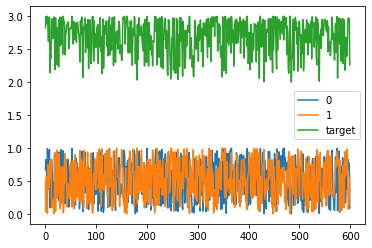

In [ ]:
df.plot()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1).copy()
y = df['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [ ]:
import tensorflow as tf


model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(500, activation = 'relu'))
model.add(tf.keras.layers.Dense(150, activation = 'relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adamax', loss='mse', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 4.8967 - accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 1.2587 - accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6135 - accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2508 - accuracy: 0.0000e+00
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2026 - accuracy: 0.0000e+00
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1618 - accuracy: 0.0000e+00
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss:

In [ ]:
import math
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error[0], math.sqrt(error[1])))

MSE: 0.000, RMSE: 0.000


In [ ]:
test = np.random.uniform(0, 1, (1,2))
yhat = model.predict(test)
print('Test value: %.3f, %.3f' % (test[0][0], test[0][1]))
print('Predicted: %.3f' % yhat)
print('Actual value: %.3f' %(test[0][0]**test[0][1]+2))

Test value: 0.481, 0.603
Predicted: 2.645
Actual value: 2.643


In [ ]:
df['yhat'] = model.predict(X)

In [ ]:
df['diff'] = df['target'] - df['yhat']

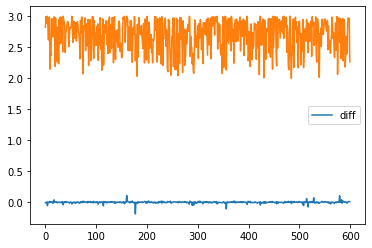

In [ ]:
df.drop(['yhat', 'target', '0', '1'], axis=1).plot(kind='line')
df['target'].plot(kind='line')